<a href="https://colab.research.google.com/github/chokkan/deeplearning/blob/master/notebook/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution

This notebook demonstrates *convolution matrix* (aka. *kernel*). See: https://en.wikipedia.org/wiki/Kernel_(image_processing)

## Load a sample image (via Pillow: a fork of Python Image Library (PIL))

In [0]:
from PIL import Image
import urllib

In [0]:
img = Image.open(urllib.request.urlopen('https://chokkan.github.io/deeplearning/assets/images/sheep.jpg'))

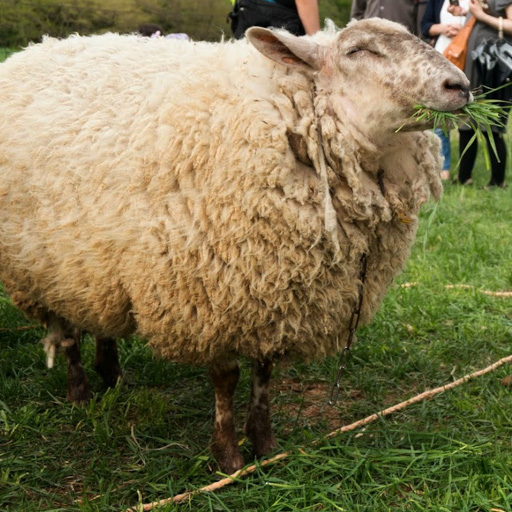

In [3]:
img

## Convert the image into torch.tensor

In [0]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [0]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),
   transforms.ToTensor()
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

Convert the PIL image object into a torch tensor.

In [0]:
input = to_tensor(img)

The shape of `input` is (channel, width, height).

In [7]:
input.shape

torch.Size([1, 512, 512])

In [8]:
input

tensor([[[0.3451, 0.3451, 0.3882,  ..., 0.4235, 0.4157, 0.3804],
         [0.3451, 0.3451, 0.3725,  ..., 0.3882, 0.3569, 0.3412],
         [0.3843, 0.3765, 0.3765,  ..., 0.2941, 0.2549, 0.2392],
         ...,
         [0.2824, 0.2863, 0.2431,  ..., 0.3333, 0.3569, 0.2941],
         [0.2549, 0.3333, 0.3686,  ..., 0.3686, 0.3529, 0.3020],
         [0.1255, 0.1373, 0.1961,  ..., 0.4588, 0.4588, 0.4431]]])

Confirm that we can convert back to the original image from the tensor.

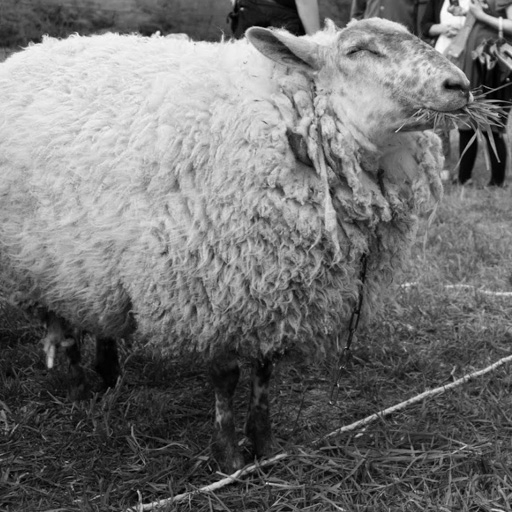

In [9]:
to_pil(input)

## Convolution layer

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3


In [0]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

The code below does not work because the convolution layer requires the dimension for batch.

In [11]:
conv(input)

RuntimeError: ignored

We need to insert a dimension for a batch at dim=0.

In [0]:
input = input.unsqueeze(0)

In [13]:
input.shape

torch.Size([1, 1, 512, 512])

In [0]:
output = conv(input)

Setting `padding=1` in the convolution layer, we obtain an image of the same size.

In [15]:
output.shape

torch.Size([1, 1, 512, 512])

We need to remove the first dimension before converting to a PIL object.

In [16]:
output.data.squeeze(dim=0).shape

torch.Size([1, 512, 512])

Display the output from the convolution layer by converting `output` to a PIL object.

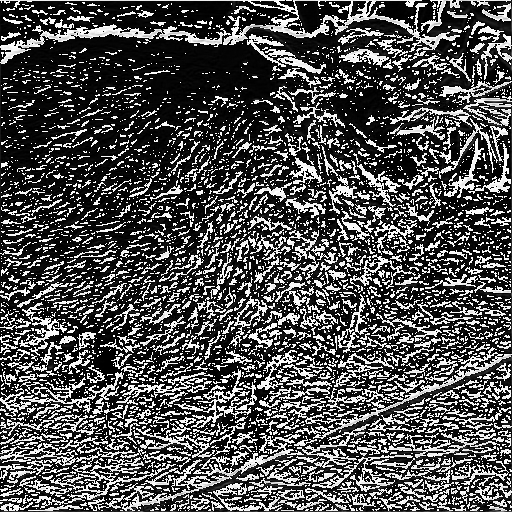

In [17]:
to_pil(output.data.squeeze(dim=0))

Clip every value in the output tensor within the range of [0, 1].

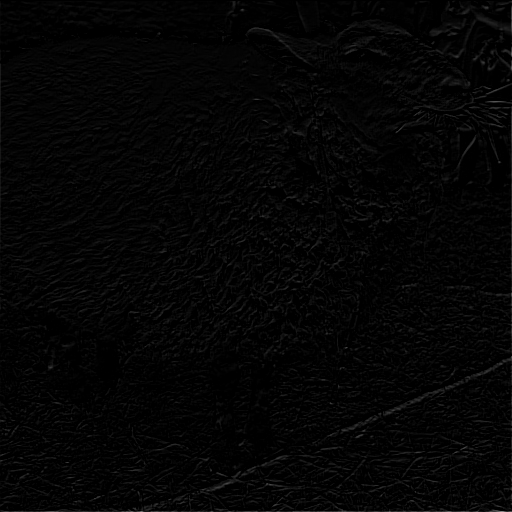

In [18]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

Utility function to show two images in a row.

In [0]:
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

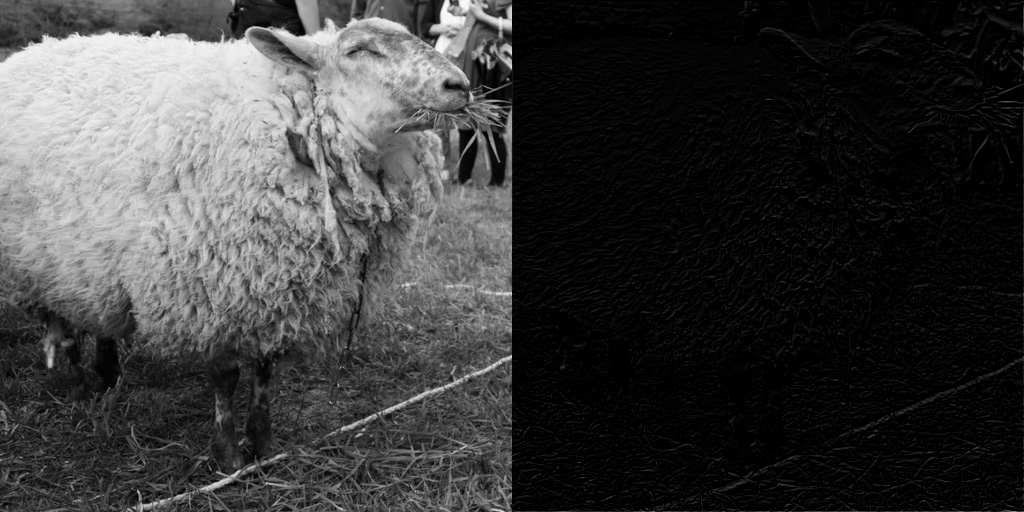

In [20]:
display(input, output)

In [21]:
conv.weight.data

tensor([[[[ 0.0042,  0.2531, -0.0511],
          [ 0.2318,  0.2064,  0.0240],
          [-0.3302, -0.0803, -0.2394]]]])

In [22]:
conv.weight.shape

torch.Size([1, 1, 3, 3])

## Identity

In [0]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

In [0]:
output = conv(input)

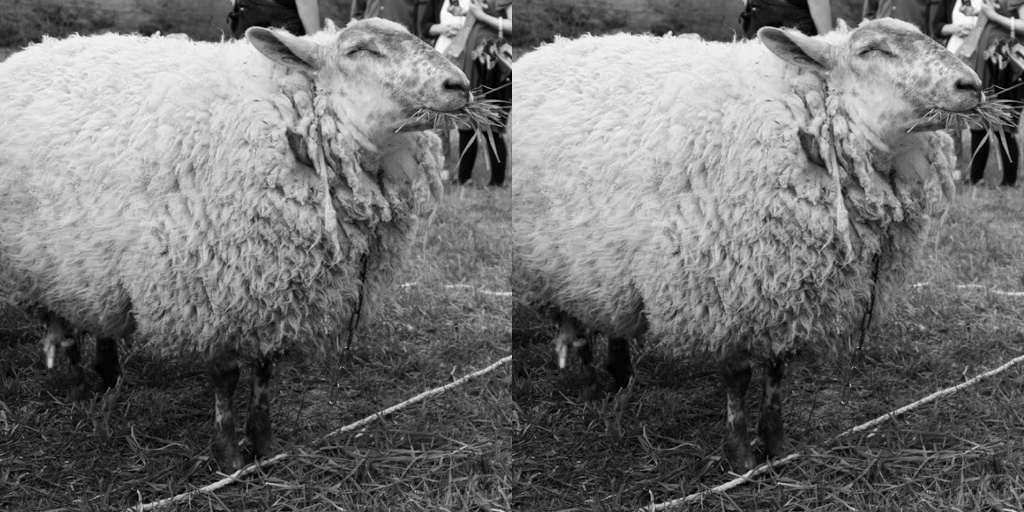

In [25]:
display(input, output)

## Brighten

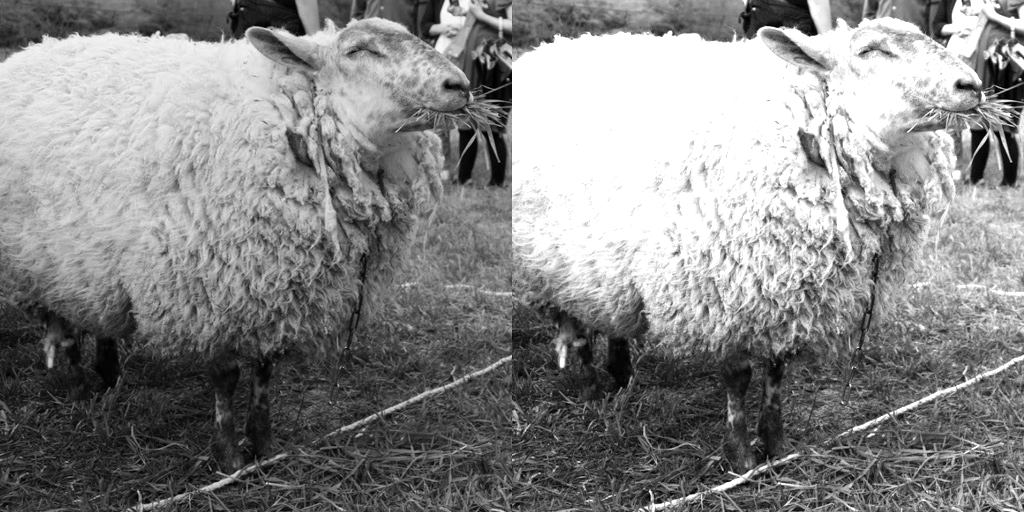

In [26]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
output = conv(input)
display(input, output)

## Darken

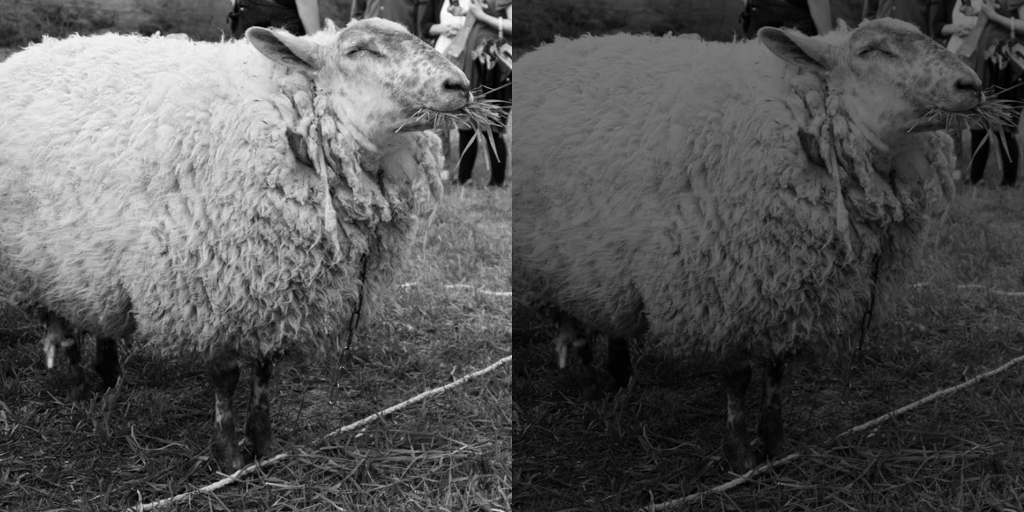

In [27]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
output = conv(input)
display(input, output)

## Box blur

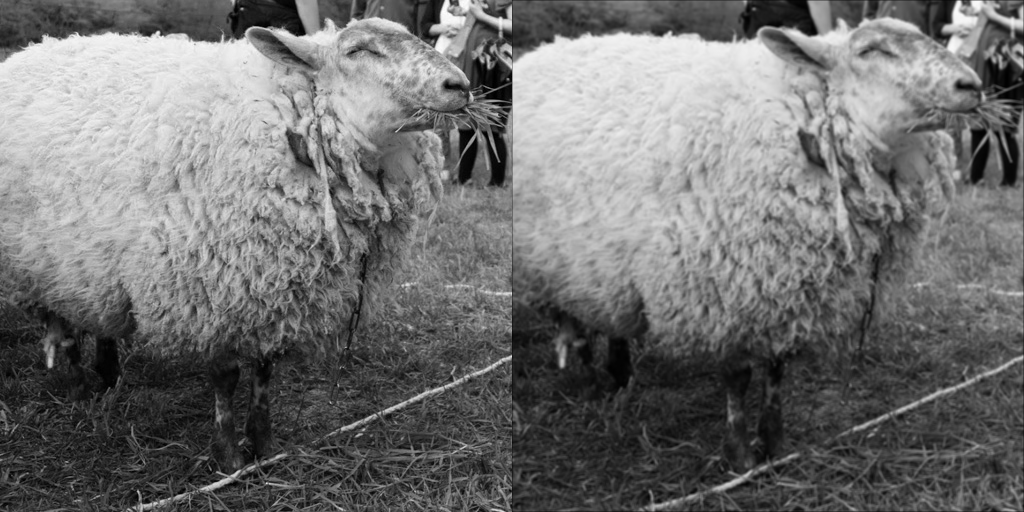

In [28]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
output = conv(input)
display(input, output)

## Gaussian blur

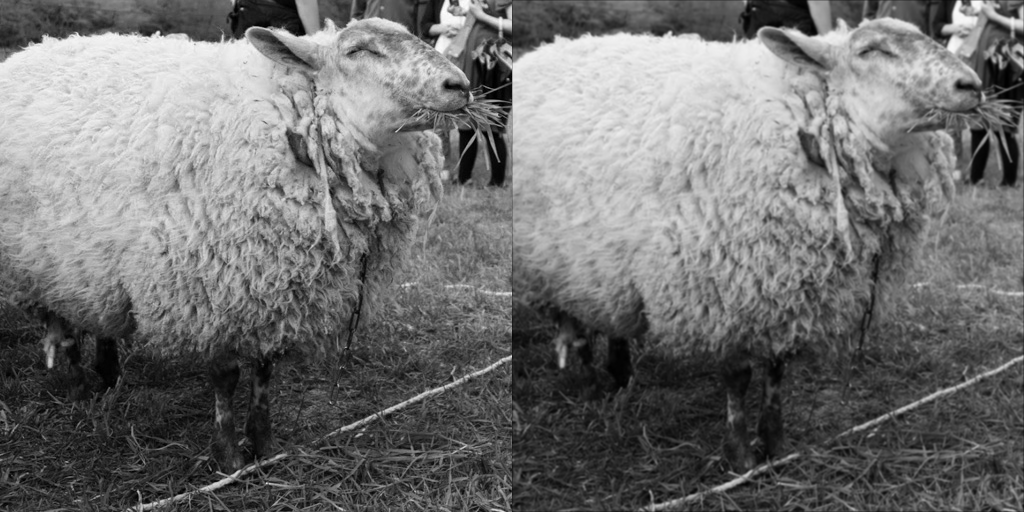

In [29]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
output = conv(input)
display(input, output)

## Sharpen

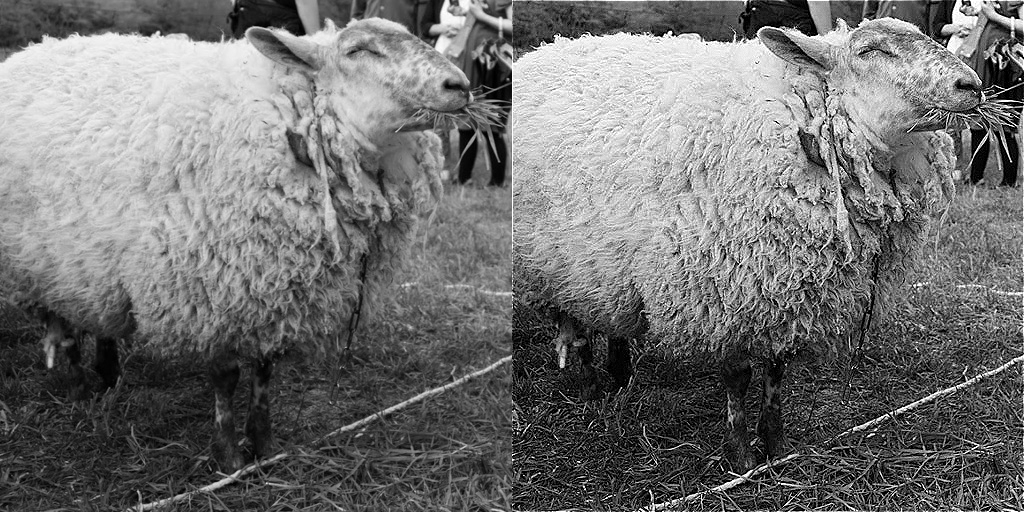

In [30]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
output = conv(input)
display(input, output)

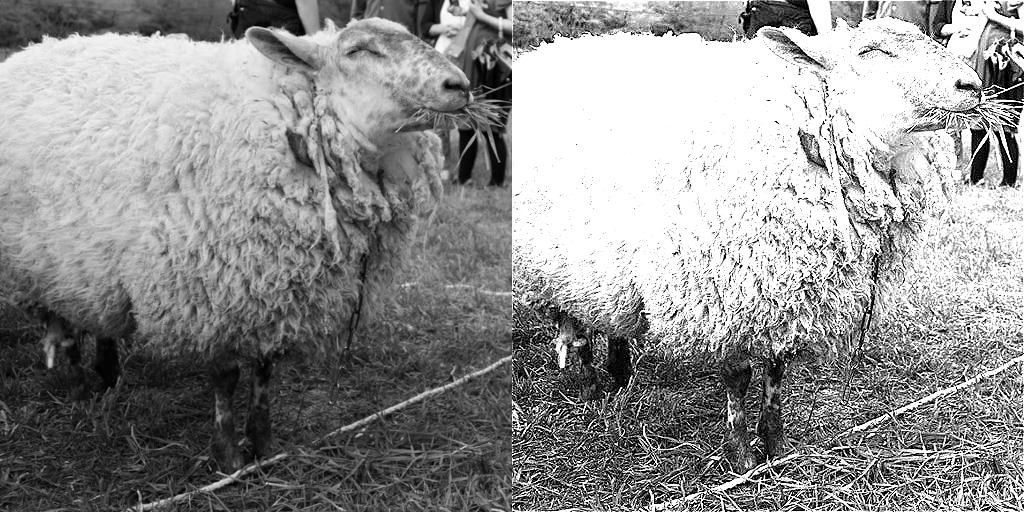

In [31]:
conv.weight.data = torch.tensor([[[
    [0., -2., 0.],
    [-2., 10., -2.],
    [0., -2., 0.],
]]])
output = conv(input)
display(input, output)

## Edge detection

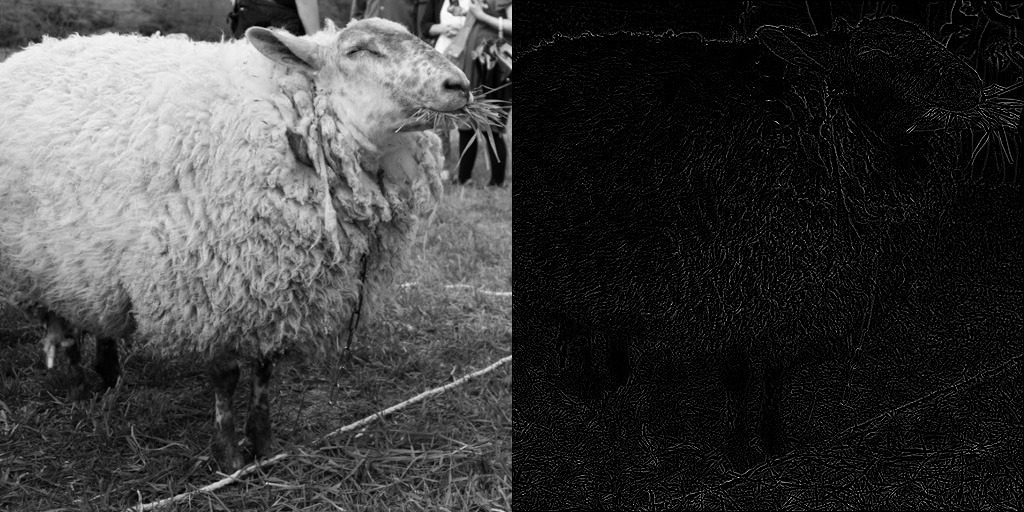

In [32]:
conv.weight.data = torch.tensor([[[
    [0., 1., 0.],
    [1., -4., 1.],
    [0., 1., 0.],
]]])
output = conv(input)
display(input, output)

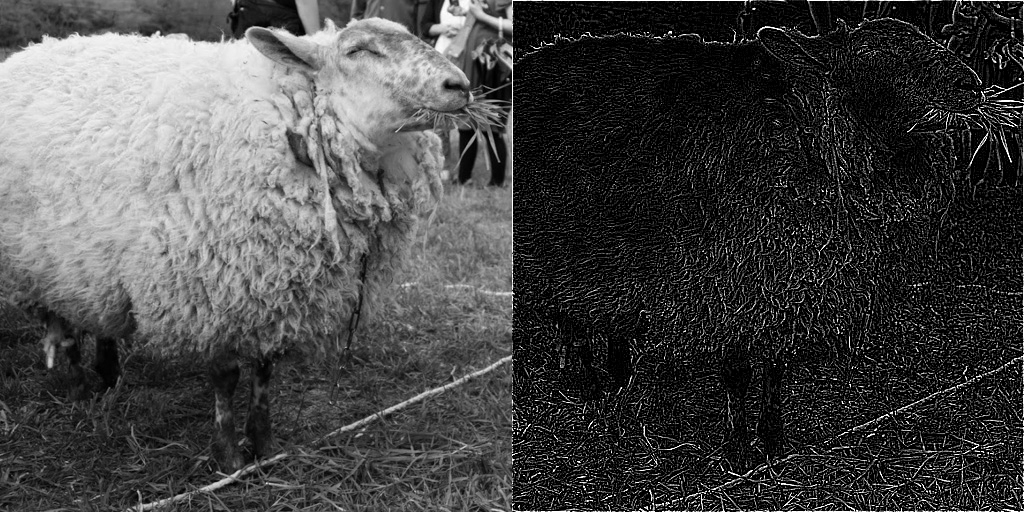

In [33]:
conv.weight.data = torch.tensor([[[
    [-1., -1., -1.],
    [-1., 8., -1.],
    [-1., -1., -1.],
]]])
output = conv(input)
display(input, output)